In [11]:
import pdfplumber
import pandas as pd
import os

In [12]:
import logging
logging.propagate = False 
logging.getLogger().setLevel(logging.ERROR)

## Pdfplumber

In [ ]:
table_Settings={
    'vertical_strategy':'text',
    'join_x_tolerance':,
    
}

In [ ]:
from collections import defaultdict
final_table=defaultdict(list)
with pdfplumber.open('adani_q1fy26_results.pdf') as pdf:
    for i,page in enumerate(pdf.pages):
        # print("page: ",i+1)
        tables=page.extract_tables()
        
        # print(tables)
        if len(tables)>0:
        #     print(tables)
            for table in tables:
                columns=[]
                empty_col=1
                for column in table[0]:
                    if column!=None and len(column)>0:
                        columns.append(column)
                    else:
                        columns.append(f'empty_col_{empty_col}')
                        empty_col+=1
                # print(columns)
                if len(columns)>0:
                    final_table[i+1].append(pd.DataFrame(columns=columns,data=table[1:]))
        # print(final_table)
        # print(tables)

In [3]:
pdf=pdfplumber.open('adani_q1fy26_results.pdf')

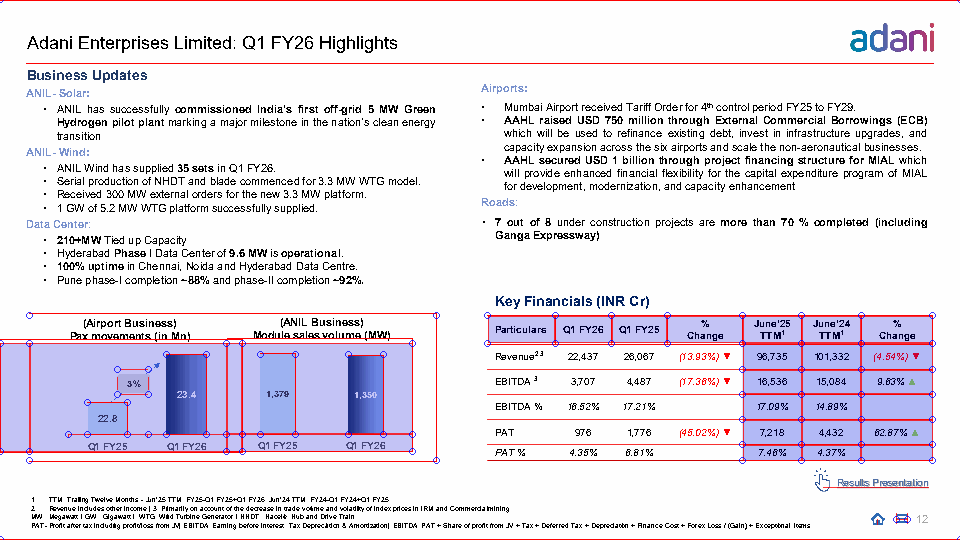

In [179]:
page=pdf.pages[11].to_image()
table_Settings={
    "vertical_strategy": "lines",
        "horizontal_strategy": "lines",
        "snap_tolerance": 6,
        "join_tolerance": 15,
        "intersection_tolerance": 8,
        # "edge_min_length": 4,
        "text_tolerance": 1,


    
}
page.reset().debug_tablefinder(table_Settings)

In [168]:
pdf.pages[11].extract_tables(resolution=700)[1]

TypeError: Page.extract_tables() got an unexpected keyword argument 'resolution'

In [134]:
len(final_table)

29

In [135]:
final_table.keys()

dict_keys([2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 29, 30, 32, 33, 34, 36, 37, 38, 41])

In [141]:
final_table[5][0]

,Utility,empty_col_1,empty_col_2,empty_col_3,empty_col_4,empty_col_5,11,",895",empty_col_6,"11,638",2.21%,▲,empty_col_7,"43,633","41,722",4.58%,▲,48.17%
0,Transport,,,,,,5,",949",,"5,265",12.99%,▲,None,"21,154","18,405",14.94%,▲,23.36%
1,AEL - Infrastr,uc,tu,re Busin,esses,,2,",825",,"2,691",4.98%,▲,None,"10,219","7,318",39.64%,▲,11.28%
2,A. Sub-total (,Inf,ra,structure,),,20,",669",,"19,594",5.49%,▲,None,"75,006","67,445",11.21%,▲,82.81%
3,B. Adjacencie,s,(C,ement),,,2,",242",,"1,638",36.87%,▲,None,"9,249","7,291",26.86%,▲,10.22%
4,Sub-total (In,fra,+,Adjacenc,ies),,22,",911",,"21,232",7.91%,▲,None,"84,255","74,736",12.74%,▲,93.03%
5,C. AEL- Exist,in,g B,usiness,es,,,882,,"1,796",(50.89%)2,▼,None,"6,317","7,766",(18.66%)2,▼,6.97%
6,Portfolio EBI,TD,A (,A+B+C),,,23,",793",,"23,028",3.32%,▲,None,"90,572","82,502",9.78%,▲,100%
7,,,,,ve,,,,,422,,,None,"2,417","3,247",,,
8,APL prior per\n(provision) in,io\nclu,d i\nde,ncome/\nd in abo,None,,,406,,None,None,None,None,None,None,None,None,None
9,,,,,None,,,,,None,None,None,None,None,None,None,None,None


In [58]:
valid_tables=defaultdict(list)
for page,tables in final_table.items():
    for table in tables:
        is_valid=False
        if len(table)<2:
            continue
        else:
            is_valid=True
        for column in table.columns:
            if "empty_col" in column:
                is_valid=False
                continue
            else:
                is_valid=True
        
        if is_valid:
            valid_tables[page].append(table)

        

In [59]:
len(valid_tables)

17

In [60]:
valid_tables.keys()

dict_keys([5, 7, 8, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38])

In [66]:
valid_tables[16][2]

,"2,140"
0,"1,401"
1,"7,393"


## Tabula

In [68]:
import tabula
tabula_tables=tabula.read_pdf("adani_q1fy26_results.pdf", pages='all',encoding="cp1252")

In [70]:
len(tabula_tables)

65

In [85]:
tabula_tables[25]

,"FY25FY24\rEBITDA (INR Cr)\r7,7476,323\rEBITDA (USD bn)\r0.910.76\rCAT (FFO) (INR Cr)\r5,1793,824\rCAT (FFO) (USD bn)\r0.610.46\r1 Year EBITDA6 Year EBITDA\rGrowth RateCAGR\r22.53%16.40%",Unnamed: 0,Unnamed: 1,Unnamed: 2
0,NaN,FY25,FY24,NaN
1,EBITDA (INR Cr),"7,747","6,323",NaN
2,EBITDA (USD bn),0.91,0.76,NaN
3,CAT (FFO) (INR Cr),"5,179","3,824",NaN
4,CAT (FFO) (USD bn),0.61,0.46,NaN
5,NaN,NaN,NaN,NaN
6,NaN,1 Year EBITDA\rGrowth Rate,NaN,6 Year EBITDA\rCAGR
7,22.53%,16.40%,NaN,NaN


## Camelot

In [86]:
import camelot

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [181]:
tables = camelot.read_pdf('adani_q1fy26_results.pdf',pages='all',flavor='stream')

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (0, 0, 960.0, 540.0)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table 

In [182]:
len(tables)

54

In [196]:
tables[13].df

,0,1,2,3,4,5,6,7,8,9,10
0,"100% uptime in Chennai, Noida and Hyderabad Da...",,,,,,,,,,
1,Pune phase-I completion ~88% and phase-II comp...,,,,,,,,,,
2,,,,,,Key Financials (INR Cr),,,,,
3,(Airport Business),,(ANIL Business),,,,,%,June’25,June’24,%
4,,,,,Particulars,Q1 FY26,Q1 FY25,,,,
5,Pax movements (in Mn),,Module sales volume (MW),,,,,Change,TTM1,TTM1,Change
6,(Airport Business),,(ANIL Business),,,,,,,,
7,,,Module sales volume (MW),,Revenue2.3,"22,437","26,067",(13.93%) ▼,"96,735","101,332",(4.54%) ▼
8,Pax movements (in Mn),,,,,,,,,,
9,3%,,,,EBITDA 3,"3,707","4,487",(17.36%) ▼,"16,536","15,084",9.63% ▲


## Table Transformer (TaTr)

In [13]:
from transformers import AutoImageProcessor, TableTransformerForObjectDetection

In [14]:
image_processor = AutoImageProcessor.from_pretrained("microsoft/table-transformer-detection")
model = TableTransformerForObjectDetection.from_pretrained("microsoft/table-transformer-detection")

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\torch\nn\modules\module.py:2446: UserWarning: for bn1.weight: copying from a non-meta parameter in the che

In [135]:
page=pdf.pages[4].to_image().original

In [7]:
# import numpy as np
# np.array(page)

In [136]:
inputs = image_processor(images=page, return_tensors="pt")
outputs = model(**inputs)

In [132]:
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

In [133]:
results

{'scores': tensor([0.9963], grad_fn=<IndexBackward0>),
 'labels': tensor([0]),
 'boxes': tensor([[424.9650, 231.9071, 802.0612, 459.5547]], grad_fn=<IndexBackward0>)}

In [134]:
model.config.id2label

{0: 'table', 1: 'table rotated'}

In [137]:
# outputs
import torch
target_sizes = torch.tensor([page.size[::-1]])
results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[
    0
]

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected table with confidence 0.999 at location [35.79, 64.1, 933.17, 333.79]


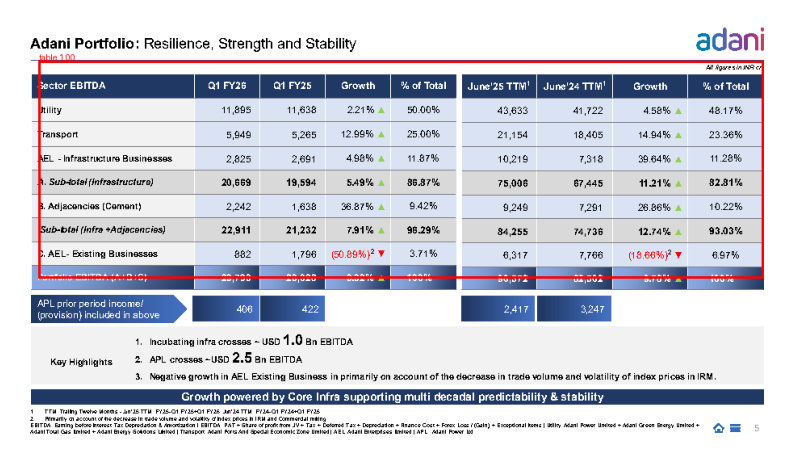

In [138]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
draw = ImageDraw.Draw(page)

for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    draw.rectangle(box, outline="red", width=3)
    draw.text((box[0], box[1]-10), f"{model.config.id2label[label.item()]} {score:.2f}", fill="red")

# 6️⃣ Show the image
plt.figure(figsize=(10, 10))
plt.imshow(page)
plt.axis("off")
plt.show()

In [30]:
pdf.pages[11].height

540

In [21]:
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()

    # ⚠️ Important: pdfplumber uses PDF coordinate system (origin = bottom-left)
    # PIL images use origin at top-left → we must flip Y coordinates
    page_height = float(pdf.pages[1].height)
    bbox_pdf = (x0-10,   y0-10, x1+10,  y1+10)

    # Crop region
    cropped_page = pdf.pages[1].within_bbox(bbox_pdf)

    # Extract the table using pdfplumber
    table = cropped_page.extract_table()

    print(f"\n--- Table {i+1} ---")
    if table:
        for row in table:
            print(row)
    else:
        print("No structured table detected, maybe text-only region.")


--- Table 1 ---
No structured table detected, maybe text-only region.


In [26]:
import camelot
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()
    # for i, area in enumerate():
    print(f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}")
    tables = camelot.read_pdf("adani_q1fy26_results.pdf", pages="2",flavor='stream',row_tol=8,table_areas=[f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}"])
    # print(f"\n--- Table {i+1} ---")
    if len(tables) > 0:
        print(tables[0].df)

414.9649658203125,298.09288024902344,812.0611572265625,90.44534301757812
     0                                              1
0   02     Adani Portfolio: Business Wise Performance
1  02a                      Adani Enterprises Limited
2  02b                     Adani Green Energy Limited
3  02c                 Adani Energy Solutions Limited
4  02d                            Adani Power Limited
5  02e                        Adani Total Gas Limited
6  02f  Adani Ports and Special Economic Zone Limited
7  02g                                 Ambuja Cements


In [152]:
tables[0].df

,0,1
0,Entity,Rating
1,AGEL RG2,BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)


In [154]:
import tabula
for i, box in enumerate(results["boxes"]):
    x0, y0, x1, y1 = box.tolist()
    dfs = tabula.read_pdf(
        "adani_q1fy26_results.pdf",
        pages=17,
        area=[y0-10,x0-10,y1+10,x1+10],       # 👈 coordinates in points
        # multiple_tables=False,
        # lattice=True     # or stream=True depending on the table type,
        encoding="cp1252",
        stream=True
    )
    print(dfs[0])

                Entity          Rating Agency         Rating
0  AGEL (Consolidated)          India Ratings    AA-/ Stable
1             AGEL RG1  CRISIL/ India Ratings  AA+/ Positive
2                  NaN        CAREEDGE/ ICRA/            NaN
3       AGEL Hybrid RG                    NaN    AA+/ Stable
4                  NaN          India Ratings            NaN
                              International Ratings
0                                     Entity Rating
1  AGEL RG2 BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)
2              AGEL RG1 BBB- (Fitch)/ Ba1 (Moody’s)


In [155]:
dfs[0]

,International Ratings
0,Entity Rating
1,AGEL RG2 BBB- (Fitch) / Ba1 (Moody's)/ BB+ (S&P)
2,AGEL RG1 BBB- (Fitch)/ Ba1 (Moody’s)


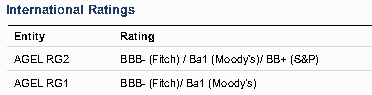

In [156]:
cropped_page.to_image()

## Extract Tables

In [15]:
import torch
from PIL import ImageDraw
import matplotlib.pyplot as plt
import camelot
import tabula

In [16]:
# pdf_path="adani_q1fy26_results.pdf"
pdf_path="nestle_report.pdf"
pdf=pdfplumber.open(pdf_path)

In [17]:
from collections import defaultdict
pdfplumber_tables=defaultdict(list)
camelot_tables=defaultdict(list)
tabula_tables=defaultdict(list)
adjustment_factor=5

for j,page in enumerate(pdf.pages):
    # print(j+1)
    page_number=page.page_number
    print(page_number)
    page_height = float(page.height)
    page_width=float(page.width)
    page_img=page.to_image().original
    inputs = image_processor(images=page_img, return_tensors="pt")
    outputs = model(**inputs)
    target_sizes = torch.tensor([page_img.size[::-1]])
    results = image_processor.post_process_object_detection(outputs, threshold=0.9, target_sizes=target_sizes)[0]

    # draw = ImageDraw.Draw(page_img)

    # for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    #     box = [round(i, 2) for i in box.tolist()]
    #     draw.rectangle(box, outline="red", width=3)
    #     draw.text((box[0], box[1]-10), f"{model.config.id2label[label.item()]} {score:.2f}", fill="red")

    # # 6️⃣ Show the image
    # plt.figure(figsize=(10, 10))
    # plt.imshow(page_img)
    # plt.axis("off")
    # plt.show()

    #iterating over all the tables detected
    for i, box in enumerate(results["boxes"]):
        # print(box)
        x0, y0, x1, y1 = box.tolist()

        #pdfplumber
        bbox_pdf = (max(0,x0-adjustment_factor),   max(0,y0-adjustment_factor), min(page_width,x1+adjustment_factor),  min(page_height,y1+adjustment_factor))

        # Crop region
        cropped_page = page.within_bbox(bbox_pdf)

        # Extract the table using pdfplumber
        table = cropped_page.extract_table()
        # print(table)
        columns=[]
        empty_col=1
        if table:
            for column in table[0]:
                if column!=None and len(column)>0:
                    columns.append(column)
                else:
                    columns.append(f'{empty_col}')
                    empty_col+=1
            # print(columns)
            if len(columns)>0:
                # print(pd.DataFrame(columns=columns,data=table[1:]))
                pdfplumber_tables[page_number].append(pd.DataFrame(columns=columns,data=table[1:]))
        print("pdfplumber done")

        #camelot
        # print(f"{x0-10},{page_height-y0-10},{x1+10},{page_height-y1+10}")
        # print(f"{max(0,x0-adjustment_factor)},{page_height-y0-adjustment_factor},{min(page_width,x1+adjustment_factor)},{page_height-y1+adjustment_factor}")
        try:
            camelot_table = camelot.read_pdf(pdf_path, pages=f"{page_number}",flavor='stream',row_tol=8,table_areas=[f"{max(0,x0-adjustment_factor)},{page_height-y0-adjustment_factor},{min(page_width,x1+adjustment_factor)},{page_height-y1+adjustment_factor}"])
            if len(camelot_table) > 0:
                camelot_tables[page_number].append(camelot_table[0].df)
        except:
            print("camelot error")
        
        print("camelot done")

        #tabula
        tabula_table = tabula.read_pdf(
            pdf_path,
            pages=page_number,
            area=[max(0,y0-adjustment_factor),max(0,x0-adjustment_factor),min(page_height,y1+adjustment_factor),min(page_width,x1+adjustment_factor)],       #coordinates in points
            encoding="cp1252",
            stream=True
        )
        tabula_tables[page_number].extend(tabula_table)
        print("tabula done")
        


1
2
3
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (51.80728530883789, 6.762699707031288, 556.694091796875, 518.1549421386719)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
4
pdfplumber done
camelot done
tabula done
5
pdfplumber done
camelot done
tabula done
6
pdfplumber done
camelot done
tabula done
7
pdfplumber done
camelot done
tabula done
8
pdfplumber done
camelot done
tabula done
9
pdfplumber done
camelot done
tabula done
10
pdfplumber done
camelot done
tabula done
11
pdfplumber done
camelot done
tabula done
12
pdfplumber done
camelot done
tabula done
13
pdfplumber done
camelot done
tabula done
14
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (26.417396545410156, 489.0255933837891, 395.3881530761719, 615.2408414916993)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
15
pdfplumber done
camelot done
tabula done
16
pdfplumber done
camelot done
tabula done
17
18
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (28.532642364501953, 82.87060986328129, 400.0213928222656, 642.861988647461)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
19
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (46.75371170043945, 531.2780805664063, 411.60504150390625, 631.9694639282227)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
20
pdfplumber done
camelot done
tabula done
21
22
23
pdfplumber done
camelot done
tabula done
24
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
25
pdfplumber done
camelot done
tabula done
26
pdfplumber done
camelot done
tabula done
27
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
28
29
pdfplumber done
camelot done
tabula done
30
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (29.22030258178711, 65.25299511718754, 407.39788818359375, 616.1415144042969)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
31
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
32
pdfplumber done
camelot done
tabula done
33
pdfplumber done
camelot done
tabula done
34
35
pdfplumber done
camelot done
tabula done
36
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (29.310943603515625, 69.94470654296879, 402.4573669433594, 477.9810834960938)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
37
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (47.86960220336914, 507.8007703857422, 420.48687744140625, 635.2310072021485)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
38
pdfplumber done
camelot done
tabula done
39
pdfplumber done
camelot done
tabula done
40
pdfplumber done
camelot done
tabula done
41
pdfplumber done
camelot done
tabula done
42
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (26.36631202697754, 242.8869978027344, 394.47979736328125, 473.6198774414063)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
43
44
45
pdfplumber done
camelot done
tabula done
46
pdfplumber done
camelot done
tabula done
47
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
48
49
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
50
pdfplumber done
camelot done
tabula done
51
pdfplumber done
camelot done
tabula done
52
pdfplumber done
camelot done
tabula done
53
pdfplumber done
camelot done
tabula done
54
55
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (48.296287536621094, 84.51672802734379, 422.23858642578125, 619.2249952392579)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
56
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (27.621990203857422, 229.4467817382813, 401.012451171875, 626.7594343261719)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
57
pdfplumber done
camelot done
tabula done
58
pdfplumber done
camelot done
tabula done
59
pdfplumber done
camelot done
tabula done
60
pdfplumber done
camelot done
tabula done
61
pdfplumber done
camelot done
tabula done
62
pdfplumber done
camelot done
tabula done
63
64
pdfplumber done
camelot done
tabula done
65
pdfplumber done
camelot done
tabula done
66
67
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (48.06768798828125, 60.95013867187504, 421.7403869628906, 615.8443494873047)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
68
pdfplumber done
camelot done
tabula done
69
pdfplumber done
camelot done
tabula done
70
pdfplumber done
camelot done
tabula done
71
pdfplumber done
camelot done
tabula done
72
73
pdfplumber done
camelot done
tabula done
74
pdfplumber done
camelot done
tabula done
75
pdfplumber done
camelot done
tabula done
76
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
77
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
78
pdfplumber done
camelot done
tabula done
pdfplumber done
camelot done
tabula done
79
pdfplumber done
camelot done
tabula done
80
pdfplumber done
camelot done
tabula done
81
pdfplumber done
camelot done
tabula done
82
pdfplumber done
camelot done
tabula done
83
pdfplumber done
camelot done
tabula done
84
pdfplumber done
camelot done
tabula done
85
pdfplumber done
camelot done
tabula done
86
87
pdfplumber done
camelot done
tabula done
88
pdfplumber done
camelot done
tabula done
89
pdfplum

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (115.78395080566406, 132.37006054687504, 478.0705871582031, 596.9386945800782)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
108
pdfplumber done


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\camelot\parsers\base.py:238: UserWarning: No tables found in table area (181.50218200683594, 85.50922070312504, 459.2088623046875, 590.4462476806641)
  cols, rows, v_s, h_s = self._generate_columns_and_rows(bbox, user_cols)


camelot done
tabula done
109
pdfplumber done
camelot done
tabula done
110
111
112
113
114
pdfplumber done
camelot done
tabula done
115
pdfplumber done
camelot done
tabula done
116
117
pdfplumber done
camelot done
tabula done
118
pdfplumber done
camelot done
tabula done
119
pdfplumber done
camelot done
tabula done
120
pdfplumber done
camelot done
tabula done
121
pdfplumber done
camelot done
tabula done
122
123
pdfplumber done
camelot done
tabula done
124
pdfplumber done
camelot done
tabula done
125
126
pdfplumber done
camelot done
tabula done
127
pdfplumber done
camelot done
tabula done
128
pdfplumber done
camelot done
tabula done
129
130
131
132
133
pdfplumber done
camelot error
camelot done
tabula done
134


In [213]:
len(pdfplumber_tables),len(camelot_tables),len(tabula_tables)

(17, 23, 23)

In [191]:
pdfplumber_tables.keys()

dict_keys([5, 8, 12, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 34, 36, 38, 41])

In [192]:
pdfplumber_tables[5][0].columns.tolist()

['Sector EBITDA', 'Q1 FY26', 'Q1 FY25', 'Growth', '% of Total']

In [118]:
pdfplumber_tables[5][0]

,Q1 FY26,Q1 FY25,Growth,% of Total
0,"11,895","11,638",2.21% ▲,50.00%
1,"5,949","5,265",12.99% ▲,25.00%
2,"2,825","2,691",4.98% ▲,11.87%
3,"20,669","19,594",5.49% ▲,86.87%
4,"2,242","1,638",36.87% ▲,9.42%
5,"22,911","21,232",7.91% ▲,96.29%
6,882,"1,796",(50.89%)2 ▼,3.71%


In [51]:
camelot_tables.keys()

dict_keys([2, 5, 8, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 36, 38, 41])

In [193]:
camelot_tables[5][0]

,0,1,2,3,4,5,6,7,8
0,,,,,,,,,All figures in INR cr
1,Sector EBITDA,Q1 FY26,Q1 FY25,Growth,% of Total,June’25 TTM1,June’24 TTM1,Growth,% of Total
2,Utility,"11,895","11,638",2.21% ▲,50.00%,"43,633","41,722",4.58% ▲,48.17%
3,Transport,"5,949","5,265",12.99% ▲,25.00%,"21,154","18,405",14.94% ▲,23.36%
4,AEL - Infrastructure Businesses,"2,825","2,691",4.98% ▲,11.87%,"10,219","7,318",39.64% ▲,11.28%
5,A. Sub-total (Infrastructure),"20,669","19,594",5.49% ▲,86.87%,"75,006","67,445",11.21% ▲,82.81%
6,B. Adjacencies (Cement),"2,242","1,638",36.87% ▲,9.42%,"9,249","7,291",26.86% ▲,10.22%
7,Sub-total (Infra +Adjacencies),"22,911","21,232",7.91% ▲,96.29%,"84,255","74,736",12.74% ▲,93.03%
8,C. AEL- Existing Businesses,882,"1,796",(50.89%)2 ▼,3.71%,"6,317","7,766",(18.66%)2 ▼,6.97%


In [103]:
camelot_tables[5][0].columns.tolist()

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [52]:
tabula_tables.keys()

dict_keys([2, 5, 8, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24, 25, 26, 28, 30, 32, 33, 34, 36, 38, 41])

In [120]:
tabula_tables[5][0]

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,All figures in INR cr
0,Sector EBITDA,Q1 FY26,Q1 FY25,Growth,% of Total,June’25 TTM1,June’24 TTM1,Growth,% of Total
1,Utility,"11,895","11,638",2.21% ?,50.00%,"43,633","41,722",4.58% ?,48.17%
2,Transport,"5,949","5,265",12.99% ?,25.00%,"21,154","18,405",14.94% ?,23.36%
3,AEL - Infrastructure Businesses,"2,825","2,691",4.98% ?,11.87%,"10,219","7,318",39.64% ?,11.28%
4,A. Sub-total (Infrastructure),"20,669","19,594",5.49% ?,86.87%,"75,006","67,445",11.21% ?,82.81%
5,B. Adjacencies (Cement),"2,242","1,638",36.87% ?,9.42%,"9,249","7,291",26.86% ?,10.22%
6,Sub-total (Infra +Adjacencies),"22,911","21,232",7.91% ?,96.29%,"84,255","74,736",12.74% ?,93.03%
7,C. AEL- Existing Businesses,882,"1,796",(50.89%)2 ?,3.71%,"6,317","7,766",(18.66%)2 ?,6.97%
8,Portfolio EBITDA (A+B+C),"23,793","23,028",3.32% ?,100%,"90,572","82,502",9.78% ?,100%


In [97]:
tabula_tables[5][0].columns.to_list()

['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 5',
 'Unnamed: 6',
 'Unnamed: 7',
 'All figures in INR cr']

## Preprocessing

1. max column names (no numbers)
2. least number of empty cells
3. combination of columns and most cell data

In [ ]:
def number_of_correct_cols(source,table):
    if source=="camelot":
        cols=table.columns.tolist()
        nums=0
        for col in cols:
            if type(col)==str and "Unnamed" not in col:
                nums+=1
        if nums==0:
            cols=list(table.iloc[0].values) #1st row sometimes has the column names in camelot
            for col in cols:
                if type(col)==str and "Unnamed" not in col:
                    nums+=1
        if nums>0:
            return nums, cols
        
    else:
        cols=table.columns.tolist()
        nums=0
        for col in cols:
            if type(col)==str and "Unnamed" not in col:
                nums+=1
    
    return nums,None


In [ ]:
def number_of_empty_cells(table):
    values=table.values.reshape(1,-1)[0]
    return pd.isna(values).sum()

In [18]:
def number_of_valid_cells(table):
    values=table.values.reshape(1,-1)[0]

    return table.shape[0]*table.shape[1]-pd.isna(values).sum() #total cells-invalid cells

In [234]:
pattern = re.compile(r'^(?![\d,.\s]+$).+')
bool(pattern.match("0,"))

False

In [19]:
import re
def process_columns(table,plumber_table):
    cols=table.columns.tolist()
    # check if columns from plumber are present or not, if plumber did not generate any table then pick the first row 
    is_valid=False
    tries=-1
    pattern = re.compile(r'^(?![\d,.\s]+$).+')
    plumber_cols=plumber_table.columns.tolist()

    is_plumber_valid=False
    for plumber_col in plumber_cols:
        if bool(pattern.match(plumber_col)):
            is_plumber_valid=True
            break
    
    # print(is_plumber_valid)

    if not plumber_table.empty and is_plumber_valid:
        for plumber_col in plumber_table.columns.tolist():
            if tries<=3 and plumber_col in cols:
                is_valid=True
                break
            else:
                if tries+1<len(table):
                    cols=list(table.iloc[tries+1].values)
                    tries+=1
        
        if is_valid:
            if tries>=0:
                table.columns=list(table.iloc[tries].values)
                table.drop(index=tries,inplace=True)

        else:
            nums=0
            for col in cols:
                if type(col)==str and "Unnamed" not in col:
                    nums+=1
            # print(nums)
            if nums==0:
                table.columns=list(table.iloc[0].values)
                table.drop(index=0,inplace=True)
    else:
        table.columns=list(table.iloc[0].values)
        table.drop(index=0,inplace=True)
    
    return table

In [109]:
# list(pdfplumber_tables.keys())+list(tabula_tables.keys())+list(camelot_tables.keys())

In [61]:
camelot_tables[52][0]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,,EUR,NA,AOA,LATAM,GC,Total,EUR,NA,AOA,LATAM,GC,Total
1,As at December 31,13.1,9.3,9.3,9.3,5.8,12.1,13.2,9.9,9.5,10.1,5.8,12.3


In [20]:
#finding the method with the highest number of valid cells
#checking highest number of valid columns
#priority order: tabula->camelot->pdfplumber
import numpy as np

all_pages=list(set(list(pdfplumber_tables.keys())+list(tabula_tables.keys())+list(camelot_tables.keys())))
all_pages.sort()

final_tables=defaultdict(list)
for page in all_pages:
    # print(page)
    pdfplumber_pages=pdfplumber_tables.get(page,[])
    camelot_pages=camelot_tables.get(page,[])
    tabula_pages=tabula_tables.get(page,[])

    max_tables=max(len(pdfplumber_pages),len(camelot_pages),len(tabula_pages))

    for i in range(max_tables):
        try:
            pdfplumber_page=pdfplumber_pages[i]
        except:
            pdfplumber_page=pd.DataFrame()
        
        try:
            camelot_page=camelot_pages[i]
        except:
            camelot_page=pd.DataFrame()
        
        try:
            tabula_page=tabula_pages[i]
        except:
            tabula_page=pd.DataFrame()


        plumber_valids,camelot_valids,tabula_valids=0,0,0
        final_table=pd.DataFrame()

        # print("plumber",pdfplumber_page,"\n","camelot",camelot_page,"\n","tabula",tabula_page)

        if not pdfplumber_page.empty:
            plumber_valids=number_of_valid_cells(pdfplumber_page)
            
        
        if not camelot_page.empty:
            camelot_valids=number_of_valid_cells(camelot_page)
            

        if not tabula_page.empty:
            tabula_valids=number_of_valid_cells(tabula_page)
        

        ## Process columns 
        if tabula_valids>camelot_valids:
            if tabula_valids>plumber_valids:
                #process columns for tabula
                final_table=process_columns(tabula_page.copy(),pdfplumber_page.copy())
                
            elif tabula_valids<plumber_valids:
                #process columns for plumber
                final_table=process_columns(pdfplumber_page.copy(),pdfplumber_page.copy())
                
            else:
                #equal case prefer tabula
                final_table=process_columns(tabula_page.copy(),pdfplumber_page.copy())

        elif tabula_valids<camelot_valids:
            if camelot_valids>plumber_valids:
                #process columns for camelot
                # print(camelot_page)
                final_table=process_columns(camelot_page.copy(),pdfplumber_page.copy())
                
            elif camelot_valids<plumber_valids:
                #process columns for plumber
                final_table=process_columns(pdfplumber_page.copy(),pdfplumber_page.copy())
        
            else:
                #equal case prefer camelot
                final_table=process_columns(camelot_page.copy(),pdfplumber_page.copy())
            
        else:
            #equal case
            if tabula_valids<plumber_valids:
                #process columns for plumber
                final_table=process_columns(pdfplumber_page.copy(),pdfplumber_page.copy())
            
            else:
                #process columns for tabula
                final_table=process_columns(tabula_page.copy(),pdfplumber_page.copy())
                
        final_tables[page].append(final_table)
    
    


In [67]:
len(final_tables)

104

In [257]:
final_tables[7]

[]

In [ ]:
#method having least number of empty cells will be chosen with column names extracted from method having most number of column names corrct
#priority order: tabula->pdfplumber->camelot

import numpy as np

all_pages=list(set(list(pdfplumber_tables.keys())+list(tabula_tables.keys())+list(camelot_tables.keys())))
all_pages.sort()

final_tables=[]
for page in all_pages:
    pdfplumber_page=pdfplumber_tables.get(page,None)
    camelot_page=camelot_tables.get(page,None)
    tabula_page=tabula_page.get(page,None)

    plumber_nums,camelot_nums,tabula_nums=0,0,0
    plumber_nulls,camelot_nulls,tabula_nulls=np.inf,np.inf,np.inf
    candidates=[]

    if pdfplumber_page:
        plumber_nums,_=number_of_correct_cols("plumber",pdfplumber_page)
        plumber_nulls=number_of_empty_cells(pdfplumber_page)
        candidates.append({
            "method": "plumber",
            "nums": plumber_nums,
            "nulls": plumber_nulls
        })
    
    if camelot_page:
        camelot_nums,camelot_cols=number_of_correct_cols("camelot",camelot_page)
        camelot_nulls=number_of_empty_cells(camelot_page)
        candidates.append({
            "method": "camelot",
            "nums": camelot_nums,
            "nulls": camelot_nulls
        })

    if tabula_page:
        tabula_nums,_=number_of_correct_cols("tabula",tabula_page)
        tabula_nulls=number_of_empty_cells(tabula_page)
        candidates.append({
            "method": "camelot",
            "nums": camelot_nums,
            "nulls": camelot_nulls
        })
    
    priority = {"tabula": 3, "plumber": 2, "camelot": 1}

    best_table = sorted(
        candidates,
        key=lambda x: (x["nulls"], -priority[x["method"]])
    )[0]
    
    # 2️⃣ Find the table with the *most* correct columns
    best_columns_source = sorted(
        candidates,
        key=lambda x: (-x["nums"], -priority[x["method"]])
    )[0]


    if best_columns_source['method']=='plumber':
        final_columns=pdfplumber_page.columns.tolist()

    elif best_columns_source['method']=='tabula':
        final_columns=tabula_page.columns.tolist()

    elif best_columns_source['method']=='camelot':
        final_columns=camelot_cols
    

    


In [95]:
pdfplumber_tables[12][0].values.reshape(1,-1)[0]

array([None, None, None, None, '96,735', '101,332', None, None, None,
       None, '16,536', '15,084', None, None, None, None, '17.09%',
       '14.89%', None, None, None, None, '7,218', '4,432', None, None,
       None, None, '7.46%', '4.37%'], dtype=object)

In [96]:
import numpy as np
pd.isna(pdfplumber_tables[12][0].values.reshape(1,-1)[0]).sum()

np.int64(20)

In [112]:
camelot_tables[5][0].iloc[0].values

array(['', '', '', '', '', '', '', '', 'All figures in INR cr'],
      dtype=object)

In [140]:
temp=tabula_tables[5][0]

In [145]:
temp.columns=list(temp.iloc[0].values)
temp.drop(index=0,inplace=True)

In [146]:
temp

,Sector EBITDA,Q1 FY26,Q1 FY25,Growth,% of Total,June’25 TTM1,June’24 TTM1,Growth,% of Total
1,Utility,"11,895","11,638",2.21% ?,50.00%,"43,633","41,722",4.58% ?,48.17%
2,Transport,"5,949","5,265",12.99% ?,25.00%,"21,154","18,405",14.94% ?,23.36%
3,AEL - Infrastructure Businesses,"2,825","2,691",4.98% ?,11.87%,"10,219","7,318",39.64% ?,11.28%
4,A. Sub-total (Infrastructure),"20,669","19,594",5.49% ?,86.87%,"75,006","67,445",11.21% ?,82.81%
5,B. Adjacencies (Cement),"2,242","1,638",36.87% ?,9.42%,"9,249","7,291",26.86% ?,10.22%
6,Sub-total (Infra +Adjacencies),"22,911","21,232",7.91% ?,96.29%,"84,255","74,736",12.74% ?,93.03%
7,C. AEL- Existing Businesses,882,"1,796",(50.89%)2 ?,3.71%,"6,317","7,766",(18.66%)2 ?,6.97%
8,Portfolio EBITDA (A+B+C),"23,793","23,028",3.32% ?,100%,"90,572","82,502",9.78% ?,100%


In [ ]:
number_of_correct_cols(pdfplumber_tables[5][0]),number_of_correct_cols(camelot_tables[5][0])

(5, 0)

## Chunking and VectorDB

1. using weaviate as vectordb to store text from pdf
2. chunking of document will be done on the basis of pages
3. add page number as metadata
4. while fetching vectors from vectordb use the metadata to fetch the table
5. convert the table to json or some format understable by llm

In [2]:
import weaviate
from langchain_weaviate import WeaviateVectorStore
from langchain_community.document_loaders import PyPDFLoader
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.document_loaders import PDFPlumberLoader,PyPDFium2Loader,pdf
# from langchain_text_splitters import CharacterTextSplitter
from langchain_community.embeddings import OllamaEmbeddings
from weaviate.connect import ConnectionParams
from weaviate.classes.init import Auth
from weaviate.classes.init import AdditionalConfig, Timeout


d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [21]:
# pdf_reader=PyPDFLoader(pdf_path)
# pdf_reader=PyMuPDFLoader(pdf_path)
pdf_reader=PDFPlumberLoader(pdf_path)
# pdf_reader=PyPDFium2Loader(pdf_path)

In [22]:
documents=pdf_reader.load()

In [71]:
documents[0].page_content

'Financial\nStatements 2024\nConsolidated Financial Statements\nof the Nestlé Group 2024\n158th Financial Statements\nof Nestlé S.A.\n'

In [72]:
len(documents)

134

In [23]:
for document in documents:
    document.metadata['page']+=1

In [74]:
print(documents[3].page_content)

79 Principal exchange rates 161 Companies of the Nestlé Group, joint
arrangements and associates
80 Consolidated income statement for
the year ended December 31, 2024 177 Report of the statutory auditor
81 Consolidated statement 188 Financial information – 5-year review
of comprehensive income for the year
ended December 31, 2024
82 Consolidated balance sheet as at
December 31, 2024
84 Consolidated cash flow statement for
the year ended December 31, 2024
85 Consolidated statement
of changes in equity for the year ended
December 31, 2024
86 Notes
86 1. Accounting policies
88 2. Scope of consolidation, acquisitions and
disposals of bbuussiinneesssseess
91 3. Analyses by segment
100 4. Net other trading and operating
income/(expenses)
102 5. Net financial income/(expense)
6. Inventories
103 7. Trade and other receivables/payables
106 8. Property, plant and equipment
110 9. Goodwill and intangible assets
116 10. Employee benefits
126 11. Provisions and contingencies
129 12. Financial instr

In [89]:
final_tables[2][0].to_json()

'{"01":{"1":"02","2":"02a","3":"02b","4":"02c","5":"02d","6":"02e","7":"02f","8":"02g"},"Adani Portfolio Overview":{"1":"Adani Portfolio: Business Wise Performance","2":"Adani Enterprises Limited","3":"Adani Green Energy Limited","4":"Adani Energy Solutions Limited","5":"Adani Power Limited","6":"Adani Total Gas Limited","7":"Adani Ports and Special Economic Zone Limited","8":"Ambuja Cements"}}'

In [24]:
final_table_markdown=defaultdict(list)
for page_num,tables in final_tables.items():
    for table in tables:
        final_table_markdown[page_num].append(table.to_markdown())

In [76]:
print(final_table_markdown[5][0])

|    | 0                         | 1   | 2              | 3      |
|---:|:--------------------------|:----|:---------------|:-------|
|  0 |                           |     | Year-end rates |        |
|  1 | 1 US Dollar               | USD | 0.904          | 0.841  |
|  2 | 1 Euro                    | EUR | 0.941          | 0.931  |
|  3 | 100 Chinese Yuan Renminbi | CNY | 12.380         | 11.859 |
|  4 | 100 Brazilian Reais       | BRL | 14.594         | 17.381 |
|  5 | 100 Mexican Pesos         | MXN | 4.370          | 4.964  |
|  6 | 1 Pound Sterling          | GBP | 1.135          | 1.072  |
|  7 | 100 Philippine Pesos      | PHP | 1.563          | 1.519  |
|  8 | 1 Canadian Dollar         | CAD | 0.629          | 0.636  |
|  9 | 100 Indian Rupee          | INR | 1.055          | 1.012  |
| 10 | 1 Australian Dollar       | AUD | 0.562          | 0.575  |
| 11 | 100 Chilean Pesos         | CLP | 0.091          | 0.095  |


In [25]:
for document in documents:
    document.metadata['table_markdown']=final_table_markdown[document.metadata['page']]

In [85]:
documents[4]

Document(metadata={'source': 'adani_q1fy26_results.pdf', 'file_path': 'adani_q1fy26_results.pdf', 'page': 5, 'total_pages': 41, 'Title': 'PowerPoint Presentation', 'Author': 'Sankit Shah', 'CreationDate': "D:20250826102515+05'30'", 'ModDate': "D:20250826102515+05'30'", 'Producer': 'Microsoft® PowerPoint® for Microsoft 365', 'Creator': 'Microsoft® PowerPoint® for Microsoft 365', 'table_markdown': ['|    | Sector EBITDA                   | Q1 FY26   | Q1 FY25   | Growth      | % of Total   | June’25 TTM1   | June’24 TTM1   | Growth      | % of Total   |\n|---:|:--------------------------------|:----------|:----------|:------------|:-------------|:---------------|:---------------|:------------|:-------------|\n|  1 | Utility                         | 11,895    | 11,638    | 2.21% ?     | 50.00%       | 43,633         | 41,722         | 4.58% ?     | 48.17%       |\n|  2 | Transport                       | 5,949     | 5,265     | 12.99% ?    | 25.00%       | 21,154         | 18,405        

In [89]:
list(table.T.iloc[0])

['Company',
 'ACL',
 'ACC',
 'APSEZ',
 '',
 '-\nAICTPL',
 'AESL',
 '- AESL USPP',
 '-\nAEML',
 '',
 '- ATSOL – OG',
 '',
 'ATGL',
 'AGEL',
 '- AGEL RG2',
 '',
 '- AGEL RG1',
 'AEL',
 '- AAHL',
 '- MIAL',
 'APL']

In [26]:
final_table_row_cols=defaultdict(list)
for page_num,tables in final_tables.items():
    for table in tables:
        table_to_text="columns: "+' '.join(map(str, list(table.columns)))+" rows: "+' '.join(map(str, list(table.T.iloc[0])))
        final_table_row_cols[page_num].append(table_to_text)

In [96]:
# final_table_row_cols

In [27]:
for document in documents:
    document.metadata['page_text']=document.page_content
    document.page_content=document.page_content+" "+' '.join(final_table_row_cols[document.metadata['page']])

In [99]:
document

Document(metadata={'source': 'adani_q1fy26_results.pdf', 'file_path': 'adani_q1fy26_results.pdf', 'page': 41, 'total_pages': 41, 'Title': 'PowerPoint Presentation', 'Author': 'Sankit Shah', 'CreationDate': "D:20250826102515+05'30'", 'ModDate': "D:20250826102515+05'30'", 'Producer': 'Microsoft® PowerPoint® for Microsoft 365', 'Creator': 'Microsoft® PowerPoint® for Microsoft 365', 'table_markdown': ["|    |              | Rating Summary Entity wise         |                                      |          |           |\n|---:|:-------------|:-----------------------------------|:-------------------------------------|:---------|:----------|\n|  1 | Company      | Global Ratings                     | Domestic Ratings                     |          |           |\n|  2 | ACL          | -                                  | AAA/Stable (Crisil)                  |          |           |\n|  3 | ACC          | -                                  | AAA/Stable (Crisil)                  |          |  

In [28]:
embeddings=OllamaEmbeddings(model="nomic-embed-text")

C:\Users\dellb\AppData\Local\Temp\ipykernel_30072\3637003424.py:1: LangChainDeprecationWarning: The class `OllamaEmbeddings` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import OllamaEmbeddings``.
  embeddings=OllamaEmbeddings(model="nomic-embed-text")


In [29]:
client = weaviate.WeaviateClient(connection_params=ConnectionParams.from_params(
        http_host="localhost",
        http_port="8080",
        http_secure=False,
        grpc_host="localhost",
        grpc_port="50051",
        grpc_secure=False,
    ))

d:\GenAI\chatWithPDF\chat_with_pdf\lib\site-packages\weaviate\warnings.py:302: ResourceWarning: Con004: The connection to Weaviate was not closed properly. This can lead to memory leaks.
            Please make sure to close the connection using `client.close()`.
  warnings.warn(
C:\Users\dellb\AppData\Local\Temp\ipykernel_30072\3994922248.py:1: ResourceWarning: unclosed <socket.socket fd=2616, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('::1', 60643, 0, 0), raddr=('::1', 8080, 0, 0)>
  client = weaviate.WeaviateClient(connection_params=ConnectionParams.from_params(


In [20]:
from env_vars import set_env_vars
set_env_vars()

Variables Set


In [21]:
weaviate_url=os.environ['WEAVIATE_URL']
weaviate_api_key=os.environ['WEAVIATE_API_KEY']

In [60]:
# weaviate_url

In [110]:
client = weaviate.connect_to_weaviate_cloud(
    cluster_url=weaviate_url,
    auth_credentials=Auth.api_key(weaviate_api_key),
    additional_config=AdditionalConfig(
        timeout=Timeout(init=60, query=120, insert=1800)  # Values in seconds
    )
)


In [30]:
client.connect()

In [31]:
print(client.is_ready())

True


In [ ]:
# client.collections.delete(
#     "ChatWithPDF"
# )

In [9]:
collections = client.collections.list_all()
print(collections)

{}


In [ ]:
# List all collections
print("Collections:", client.collections.list_all())

# Get one collection
collection = client.collections.get("ChatWithPDF")

# Inspect configuration
config = collection.config.get()  # no arguments

# Print all properties
for prop in config.properties:
    print(prop.name, "-", prop.data_type)


Collections: {'Chat_with_pdf': _CollectionConfigSimple(name='Chat_with_pdf', description=None, generative_config=None, properties=[_Property(name='text', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectorizer_config=None, vectorizer='none', vectorizer_configs=None)], references=[], reranker_config=None, vectorizer_config=None, vectorizer=<Vectorizers.NONE: 'none'>, vector_config=None), 'LangChain_65cd17277d1f43baa2d133d77c452863': _CollectionConfigSimple(name='LangChain_65cd17277d1f43baa2d133d77c452863', description=None, generative_config=None, properties=[_Property(name='text', description=None, data_type=<DataType.TEXT: 'text'>, index_filterable=True, index_range_filters=False, index_searchable=True, nested_properties=None, tokenization=<Tokenization.WORD: 'word'>, vectorizer_config=None, vectorizer='none', vectorizer_configs=None), _Pro

In [32]:
db = WeaviateVectorStore.from_documents(documents, embeddings, client=client,index_name="ChatWithPDF")

In [33]:
db=WeaviateVectorStore(client=client,index_name="ChatWithPDF",text_key="text",embedding=embeddings)
# db=WeaviateVectorStore(client=client,index_name="NestlePDF",text_key="text",embedding=embeddings)

In [34]:
# db.similarity_search("A World Class Infrastructure & Utility Portfolio") #page 4
db.similarity_search("what is the document about") #nestle report

[Document(metadata={'title': 'Financial Statements 2024', 'page': 13.0, 'total_pages': 134.0, 'author': 'Nestlé S.A.', 'page_text': '1. Accounting policies\nHyperinflationary economies of outsourced transportation services, salaries and wages\nSeveral factors are considered when evaluating whether of drivers, warehouse employees and customer service staff,\nan economy is hyperinflationary, including the cumulative as well as depreciation and running costs of warehouses\nthree-year inflation, and the degree to which the population’s and related storage, transportation and handling equipment.\nbehaviors and government policies are consistent with such Marketing and administration expenses include the costs of\na condition. advertising and consumer promotion activities, merchandising,\nThe balance sheet and results of subsidiaries operating sales teams and head office functions such as finance, human\nin hyperinflationary economies are restated for the changes resources, legal, informatio

## LLM Integration

In [35]:

from langchain_ollama import OllamaLLM
from langchain_classic.prompts import PromptTemplate

In [37]:
llm=OllamaLLM(model='llama3')

In [38]:
# llm.invoke("hello")

In [44]:
query="What are the contents of this pdf"

In [47]:
doc_extracted=db.similarity_search_with_relevance_scores(query,k=5)

In [110]:
doc_extracted=db.similarity_search_with_relevance_scores("what is the ebidta of adani companies",k=5)

In [50]:
doc_extracted[0][1]

np.float64(0.6681877695251427)

In [58]:
filter(lambda x:x[1]>0.65,doc_extracted)

In [59]:
sorted(filter(lambda x:x[1]>0.65,doc_extracted),key=lambda k:k[1],reverse=True)

[(Document(metadata={'total_pages': 134.0, 'page': 2.0, 'trapped': 'False', 'page_text': '\n', 'author': 'Nestlé S.A.', 'source': 'nestle_report.pdf', 'file_path': 'nestle_report.pdf', 'creationDate': "D:20250212130229+01'00'", 'creator': 'Adobe InDesign 15.1 (Windows)', 'modDate': "D:20250212180706+01'00'", 'table_markdown': [], 'producer': 'Adobe PDF Library 15.0', 'title': 'Financial Statements 2024'}, page_content='\n '),
  np.float64(0.6681877695251427)),
 (Document(metadata={'trapped': 'False', 'page': 113.0, 'total_pages': 134.0, 'page_text': 'Consolidated Financial Statements of the Nestlé Group 2024 187\n', 'author': 'Nestlé S.A.', 'title': 'Financial Statements 2024', 'modDate': "D:20250212180706+01'00'", 'file_path': 'nestle_report.pdf', 'creationDate': "D:20250212130229+01'00'", 'creator': 'Adobe InDesign 15.1 (Windows)', 'table_markdown': [], 'producer': 'Adobe PDF Library 15.0', 'source': 'nestle_report.pdf'}, page_content='Consolidated Financial Statements of the Nestlé 

In [70]:
doc_extracted[0].page_content

'Contents\n01 Adani Portfolio Overview\n02 Adani Portfolio: Business Wise Performance\n02a Adani Enterprises Limited\n02b Adani Green Energy Limited\n02c Adani Energy Solutions Limited\n02d Adani Power Limited\n02e Adani Total Gas Limited\n02f Adani Ports and Special Economic Zone Limited\n02g Ambuja Cements\nHome outline Hsoalmid bfiullrger Menu Icon with 2\n'

In [69]:
# tables_text

In [ ]:
# tables_text = "\n".join(doc_extracted[0].metadata["table_markdown"])
# query="What are the contents of this pdf"

template = """
You are a highly reliable question-answering assistant specialized in analyzing PDF documents.
You may receive both text and tabular data as context.

Your job is to carefully analyze the provided content and respond **only** using the given context and tables.

Follow these rules:
1. **Answer length** - Adjust naturally based on the question:
   - If the query asks for a list, summary, or table of contents, give a clear, concise structured answer.
   - If the query asks for explanation, comparison, or interpretation, respond in detail.
2. **Table handling** - If a table is provided, consider it part of the context. Never state that no table exists.
3. **Truthfulness** - Do not guess or fabricate. If the answer cannot be found in the provided data, convey that you dont know.
4. **Clarity** - Avoid redundant introductions (e.g., "Based on the context..."). Go straight to the answer and explain it nicely instead of just printing the context or table directly.
5. **Politeness** - If the user's query is unclear or incomplete, ask for clarification politely.

DO NOT MENTION ABOUT CONTEXT OR TABLE OR ANYTHING JUST UNDERSTAND WHAT IT SAYS AND EXPLAIN IT TO SATISFY THE USER QUERY.

Context:
{context}

Tables:
{tables_text}

User Query:
{query}
"""


prompt=PromptTemplate(input_variables=['context','tables_text','query'],template=template)
# formatted_prompt=prompt.format(context=doc_extracted[0].page_content,tables_text=tables_text,query=query)

# response = llm.invoke(formatted_prompt)



In [74]:
print(response)

I'm unable to find any information about the earnings or profitability (EBITDA) of Adani companies in the provided context and tables. The tables only list the different business segments and subsidiaries of Adani, but do not provide financial data. Therefore, I don't know.


In [75]:
print(doc_extracted[0].page_content)

Home outline
 Hamburger Menu Icon with 
solid fill
201 Adani Portfolio Overview
02 Adani Portfolio: Business Wise Performance
02a Adani Enterprises Limited
02b Adani Green Energy Limited
02c Adani Energy Solutions Limited
02d Adani Power Limited
02e Adani Total Gas Limited
02f Adani Ports and Special Economic Zone Limited
02g Ambuja  CementsContents


In [91]:
print(tables_text)

|    | 01   | Adani Portfolio Overview                      |
|---:|:-----|:----------------------------------------------|
|  1 | 02   | Adani Portfolio: Business Wise Performance    |
|  2 | 02a  | Adani Enterprises Limited                     |
|  3 | 02b  | Adani Green Energy Limited                    |
|  4 | 02c  | Adani Energy Solutions Limited                |
|  5 | 02d  | Adani Power Limited                           |
|  6 | 02e  | Adani Total Gas Limited                       |
|  7 | 02f  | Adani Ports and Special Economic Zone Limited |
|  8 | 02g  | Ambuja Cements                                |


### Testing more

In [61]:
def get_context(query:str):
    docs=db.similarity_search_with_relevance_scores(query,k=10)
    docs=sorted(filter(lambda x:x[1]>0.65,docs),key=lambda k:k[1],reverse=True)
    # print(len(docs))
    # print(docs)
    context=""
    tables=""
    for doc in docs:
        print(doc[0].metadata['page'])
        context+=doc[0].metadata['page_text']
        tables+="\n".join(doc[0].metadata["table_markdown"])

    return context,tables

query="give me a summary of Consolidated balance sheet as at December 31, 2024"
context,tables_text=get_context(query)
print("context and tables fetched")
formatted_prompt=prompt.format(context=context,tables_text=tables_text,query=query)

response = llm.invoke(formatted_prompt)

8.0
118.0
120.0
9.0
116.0
4.0
53.0
context and tables fetched


In [43]:
print(response)

Based on the provided PDF document, here is a summary of the Consolidated Balance Sheet as at December 31, 2024:

**Assets:**

* Total assets: €139,264 million

**Liabilities and Equity:**

* Total liabilities: €102,571 million
	+ Current liabilities: €42,863 million
	+ Non-current liabilities: €59,708 million
* Total equity: €36,693 million
	+ Share capital: €262 million
	+ Treasury shares: (€4,283) million
	+ Retained earnings: €66,363 million
	+ Translation reserve: (€26,788) million
	+ Other reserves: €363 million
* Non-controlling interests: €776 million

Please note that the actual values may vary depending on the specific currency and formatting used in the original document.


In [62]:
print(context)

Consolidated balance sheet
as at December 31, 2024
before appropriations
In millions of CHF
Notes 2024 2023
Assets
Current assets
Cash and cash equivalents 12/16 5 556 4 816
Short-term investments 12 2 315 1 035
Inventories 6 13 260 11 896
Trade and other receivables 7/12 11 251 10 995
Prepayments 543 521
Derivative assets 12 792 278
Current income tax assets 1 334 1 284
Assets held for sale 137 32
Total current assets 35 188 30 857
Non-current assets
Property, plant and equipment 8 33 706 30 467
Goodwill 9 30 595 28 693
Intangible assets 9 19 245 18 225
Investments in associates and joint ventures 14 14 326 13 088
Financial assets 12 3 650 2 947
Derivative assets 12 84 130
Employee benefits assets and reimbursement rights 10 1 475 962
Deferred tax assets 13 995 1 181
Total non-current assets 104 076 95 693
Total assets 139 264 126 550
82 Consolidated Financial Statements of the Nestlé Group 2024
193 Income statement for the year ended
December 31, 2024
194 Balance sheet as at December

In [63]:
print(tables_text)

|    |                                                   | Notes   | 2024    | 2023    |
|---:|:--------------------------------------------------|:--------|:--------|:--------|
|  1 | Assets                                            |         |         |         |
|  2 | Current assets                                    |         |         |         |
|  3 | Cash and cash equivalents                         | 12/16   | 5 556   | 4 816   |
|  4 | Short-term investments                            | 12      | 2 315   | 1 035   |
|  5 | Inventories                                       | 6       | 13 260  | 11 896  |
|  6 | Trade and other receivables                       | 7/12    | 11 251  | 10 995  |
|  7 | Prepayments                                       |         | 543     | 521     |
|  8 | Derivative assets                                 | 12      | 792     | 278     |
|  9 | Current income tax assets                         |         | 1 334   | 1 284   |
| 10 | Assets held fo

## Adding Chat history

In [26]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_classic.chains import create_retrieval_chain, create_history_aware_retriever
from langchain_core.runnables.history import RunnableWithMessageHistory
from langchain_community.chat_message_histories import ChatMessageHistory
from langchain_core.chat_history import BaseChatMessageHistory
from langchain_classic.chains.combine_documents import create_stuff_documents_chain
from langchain_classic.llms import HuggingFacePipeline

In [27]:
system_message=(""" You are a highly reliable question-answering assistant specialized in analyzing PDF documents. 
You may receive both text and tabular data as context. 

Your task is to carefully understand the structure and content of the provided data 
and give clear, accurate, and well-explained answers to user queries.

If the required information is not present in the given context or previous conversation, 
respond with: “I don't know.” 

If the user's query is unclear or incomplete, politely ask them to repeat or clarify the question. 
Avoid guessing or fabricating information under any circumstance.

                    \n\n
                    {context}.""")

prompt=ChatPromptTemplate.from_messages([("system",system_message),
                                         MessagesPlaceholder("chat_history"),
                                        ("human","{input}")])

In [28]:
llm=HuggingFacePipeline(pipeline=pipe)

C:\Users\dellb\AppData\Local\Temp\ipykernel_31828\3650147293.py:1: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFacePipeline``.
  llm=HuggingFacePipeline(pipeline=pipe)


In [31]:
llm.invoke("who are you")

'who are you?\n\n(I am a large language model, trained by Google.)\n\nI can generate text in response to a wide range of prompts and questions, but my knowledge about the world is limited to what I was trained on.\n\n---\n\n**Disclaimer:** *I am an AI Chatbot and do not have personal opinions or beliefs.*\n\n---\n\n**You can use me to:**\n\n*   Generate creative text formats, like poems, code, scripts, musical pieces, email, letters, etc.\n*   Answer your questions in an informative way, even if they are open ended, challenging, or strange.\n*   Translate languages.\n\n**Please use me responsibly.**\n\n---\n\n**Do you have any questions about how I work?**\n'

In [85]:
# llm.model_config

In [29]:
stuff_doc_chain=create_stuff_documents_chain(llm,prompt)

In [30]:
retriever=db.as_retriever(search_kwargs={"k":1})

In [57]:
#prompt for chat history

# system_history=""" Given a chat history and the latest user question 
#     which might reference context in the chat history, 
#     formulate a standalone question which can be understood 
#     without the chat history. Do NOT answer the question, 
#     just reformulate it if needed and otherwise return it as is."""

# history_prompt=ChatPromptTemplate.from_messages([("system",system_history),
#                                   MessagesPlaceholder("chat_history"),
#                                   ("human","{input}")])

In [31]:
retriever=create_history_aware_retriever(llm,retriever,prompt)

In [32]:
retriever_chain=create_retrieval_chain(retriever,stuff_doc_chain)

In [61]:
# retriever_chain.invoke({"input":"what is the pdf about"})

In [41]:
store={}

def get_session_history(session_id)->BaseChatMessageHistory:
    if session_id not in store:
        store[session_id]=ChatMessageHistory()
    return store[session_id]

In [34]:
rag_chain=RunnableWithMessageHistory(retriever_chain,get_session_history, input_messages_key="input",
                                     history_messages_key="chat_history", output_messages_key="answer")

In [42]:
config={"configurable":{"session_id":"abcd"}}

In [37]:
response=rag_chain.invoke({"input":"what is the pdf about?"},config=config)

In [77]:
response

{'input': 'what is the pdf about?',
 'chat_history': [],
 'context': [Document(metadata={'title': 'PowerPoint Presentation', 'page': 3.0, 'author': 'Sankit Shah', 'page_label': '3', 'moddate': datetime.datetime(2025, 8, 26, 10, 25, 15, tzinfo=datetime.timezone(datetime.timedelta(seconds=19800))), 'total_pages': 41.0, 'creationdate': datetime.datetime(2025, 8, 26, 10, 25, 15, tzinfo=datetime.timezone(datetime.timedelta(seconds=19800))), 'creator': 'Microsoft® PowerPoint® for Microsoft 365', 'table_markdown': [], 'producer': 'Microsoft® PowerPoint® for Microsoft 365', 'source': 'adani_q1fy26_results.pdf'}, page_content='STRICTLY CONFIDENTIALSTRICTLY CONFIDENTIALAdani Portfolio Overview01')],
 'answer': 'System:  You are a highly reliable question-answering assistant specialized in analyzing PDF documents. \nYou may receive both text and tabular data as context. \n\nYour task is to carefully understand the structure and content of the provided data \nand give clear, accurate, and well-exp

In [78]:
print(response['answer'])

System:  You are a highly reliable question-answering assistant specialized in analyzing PDF documents. 
You may receive both text and tabular data as context. 

Your task is to carefully understand the structure and content of the provided data 
and give clear, accurate, and well-explained answers to user queries.

If the required information is not present in the given context or previous conversation, 
respond with: “I don't know.” 

If the user's query is unclear or incomplete, politely ask them to repeat or clarify the question. 
Avoid guessing or fabricating information under any circumstance.

                    


                    STRICTLY CONFIDENTIALSTRICTLY CONFIDENTIALAdani Portfolio Overview01.
Human: what is the pdf about?
User: It contains information about the Adani portfolio.
System:
Okay, I understand the document contains information about the Adani portfolio.  
What specifically would you like me to do with this information?  For example, would you like me to:
1

In [43]:
from langchain_core.output_parsers import StrOutputParser
retrieval_prompt = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant that reformulates user questions to improve document retrieval."),
    MessagesPlaceholder("chat_history"),
    ("human", "{input}")
])

# 2️⃣ Your real system message for final answering
system_message = """
You are a highly reliable question-answering assistant specialized in analyzing PDF documents. 
You may receive both text and tabular data as context.

Carefully read the provided context and give clear, concise, and accurate answers
**based strictly on the information present in the context**.  
If a specific detail (like a number or trend) is mentioned, quote it directly.  

If the answer cannot be found in the provided context, respond with:
“I don't know, the information is not available in the document.”  

Do not make assumptions or include outside information.  
If the user's question is unclear, politely ask them to clarify.


{context}
"""

# 3️⃣ Prompt for answering phase
qa_prompt = ChatPromptTemplate.from_messages([
    ("system", system_message),
    MessagesPlaceholder("chat_history"),
    ("human", "{input}")
])

# 4️⃣ Create stuff-doc chain (answering)
stuff_doc_chain = create_stuff_documents_chain(llm, qa_prompt)

# 5️⃣ Create retriever
retriever = db.as_retriever(search_kwargs={"k": 3})

# 6️⃣ Create history-aware retriever (with simpler retrieval prompt)
retriever = create_history_aware_retriever(llm, retriever, retrieval_prompt)

# 7️⃣ Combine into RAG
retriever_chain = create_retrieval_chain(retriever, stuff_doc_chain)

# 8️⃣ Add chat memory
rag_chain = RunnableWithMessageHistory(
    retriever_chain,
    get_session_history,
    input_messages_key="input",
    history_messages_key="chat_history",
    output_messages_key="answer"
)
rag_chain=rag_chain|StrOutputParser()
# 9️⃣ Invoke
response = rag_chain.invoke(
    {"input": "What is the PDF about?"},
    config=config
)

# print(response["answer"])

ValidationError: 1 validation error for Generation
text
  Input should be a valid string [type=string_type, input_value={'input': 'What is the PD...nsibility is 13.86%.\n"}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type

In [ ]:
response

{'input': 'What is the PDF about?',
 'chat_history': [HumanMessage(content='what is the pdf about?', additional_kwargs={}, response_metadata={}),
  AIMessage(content='System:  You are a highly reliable question-answering assistant specialized in analyzing PDF documents. \nYou may receive both text and tabular data as context. \n\nYour task is to carefully understand the structure and content of the provided data \nand give clear, accurate, and well-explained answers to user queries.\n\nIf the required information is not present in the given context or previous conversation, \nrespond with: “I don\'t know.” \n\nIf the user\'s query is unclear or incomplete, politely ask them to repeat or clarify the question. \nAvoid guessing or fabricating information under any circumstance.\n\n                    \n\n\n                    STRICTLY CONFIDENTIALSTRICTLY CONFIDENTIALAdani Portfolio Overview01.\nHuman: what is the pdf about?\n```text\n"Adani Group Limited\nis a multinational conglomerate 

In [ ]:
print(response['answer'])

System: 
You are a highly reliable question-answering assistant specialized in analyzing PDF documents. 
You may receive both text and tabular data as context.

Carefully read the provided context and give clear, concise, and accurate answers
**based strictly on the information present in the context**.  
If a specific detail (like a number or trend) is mentioned, quote it directly.  

If the answer cannot be found in the provided context, respond with:
“I don't know, the information is not available in the document.”  

Do not make assumptions or include outside information.  
If the user's question is unclear, politely ask them to clarify.


Home outline
 Hamburger Menu Icon with 
solid fill
4151%36%
13%
98%2% Infra level
Ringfenced
Coporate LevelA  Category AAA – AA+ AA – AA-IG BB+
BBB+ - Below DomesticGlobal BB-RR EBITDA Quality1
98% of rated entity’s ringfenced from corporateCompany Global Ratings Domestic Ratings
ACL - AAA/Stable (Crisil )
ACC - AAA/Stable (Crisil )
APSEZ BBB-(S&